In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
from sklearn.tree import DecisionTreeClassifier, plot_tree, export_text
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report

In [3]:
df = pd.read_csv(r"C:\Users\dnson\Downloads\student_performance.csv")

In [5]:
print("\nFirst 5 Rows")
print(df.head())


First 5 Rows
   Hours_Studied  Previous_Scores Extracurricular  Sleep_Hours  \
0              2               40              No            6   
1              5               60             Yes            7   
2              8               85              No            8   
3              1               35              No            5   
4              6               75             Yes            7   

  Internet_Access  Attendance Performance  
0             Yes          70         Low  
1             Yes          80      Medium  
2             Yes          90        High  
3              No          60         Low  
4             Yes          85        High  


In [6]:
print("\nDataset Info")
print(df.info())


Dataset Info
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20 entries, 0 to 19
Data columns (total 7 columns):
 #   Column           Non-Null Count  Dtype 
---  ------           --------------  ----- 
 0   Hours_Studied    20 non-null     int64 
 1   Previous_Scores  20 non-null     int64 
 2   Extracurricular  20 non-null     object
 3   Sleep_Hours      20 non-null     int64 
 4   Internet_Access  20 non-null     object
 5   Attendance       20 non-null     int64 
 6   Performance      20 non-null     object
dtypes: int64(4), object(3)
memory usage: 1.2+ KB
None


In [7]:
print("\nMissing Values")
print(df.isnull().sum())


Missing Values
Hours_Studied      0
Previous_Scores    0
Extracurricular    0
Sleep_Hours        0
Internet_Access    0
Attendance         0
Performance        0
dtype: int64


In [8]:
label_encoders = {}
for col in ['Extracurricular', 'Internet_Access', 'Performance']:
    le = LabelEncoder()
    df[col] = le.fit_transform(df[col])
    label_encoders[col] = le

print("\nAfter Encoding")
print(df.head())


After Encoding
   Hours_Studied  Previous_Scores  Extracurricular  Sleep_Hours  \
0              2               40                0            6   
1              5               60                1            7   
2              8               85                0            8   
3              1               35                0            5   
4              6               75                1            7   

   Internet_Access  Attendance  Performance  
0                1          70            1  
1                1          80            2  
2                1          90            0  
3                0          60            1  
4                1          85            0  


In [12]:
X = df.drop("Performance", axis=1)
y = df["Performance"]

X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.3, random_state=42, stratify=y
)

print("Training set size:", X_train.shape)
print("Testing set size:", X_test.shape)

Training set size: (14, 6)
Testing set size: (6, 6)


In [13]:
dt = DecisionTreeClassifier(random_state=42)
dt.fit(X_train, y_train)
print("\nDecision Rules (Tree Structure)")
print(export_text(dt, feature_names=list(X.columns)))


Decision Rules (Tree Structure)
|--- Hours_Studied <= 3.50
|   |--- class: 1
|--- Hours_Studied >  3.50
|   |--- Hours_Studied <= 5.50
|   |   |--- class: 2
|   |--- Hours_Studied >  5.50
|   |   |--- class: 0



In [14]:
y_pred = dt.predict(X_test)
print("\nAccuracy")
print(accuracy_score(y_test, y_pred))
print("\nConfusion Matrix")
print(confusion_matrix(y_test, y_pred))
print("\nClassification Report")
print(classification_report(y_test, y_pred))


Accuracy
1.0

Confusion Matrix
[[2 0 0]
 [0 2 0]
 [0 0 2]]

Classification Report
              precision    recall  f1-score   support

           0       1.00      1.00      1.00         2
           1       1.00      1.00      1.00         2
           2       1.00      1.00      1.00         2

    accuracy                           1.00         6
   macro avg       1.00      1.00      1.00         6
weighted avg       1.00      1.00      1.00         6



In [15]:
criteria = ["gini", "entropy"]
depths = [2, 3, 4, 5, None]

results = []
for crit in criteria:
    for depth in depths:
        model = DecisionTreeClassifier(criterion=crit, max_depth=depth, random_state=42)
        model.fit(X_train, y_train)
        y_pred = model.predict(X_test)
        acc = accuracy_score(y_test, y_pred)
        results.append((crit, depth, acc))

print("\nTuning Results")
for r in results:
    print(f"Criterion: {r[0]}, Max Depth: {r[1]}, Accuracy: {r[2]:.3f}")  


Tuning Results
Criterion: gini, Max Depth: 2, Accuracy: 1.000
Criterion: gini, Max Depth: 3, Accuracy: 1.000
Criterion: gini, Max Depth: 4, Accuracy: 1.000
Criterion: gini, Max Depth: 5, Accuracy: 1.000
Criterion: gini, Max Depth: None, Accuracy: 1.000
Criterion: entropy, Max Depth: 2, Accuracy: 1.000
Criterion: entropy, Max Depth: 3, Accuracy: 1.000
Criterion: entropy, Max Depth: 4, Accuracy: 1.000
Criterion: entropy, Max Depth: 5, Accuracy: 1.000
Criterion: entropy, Max Depth: None, Accuracy: 1.000


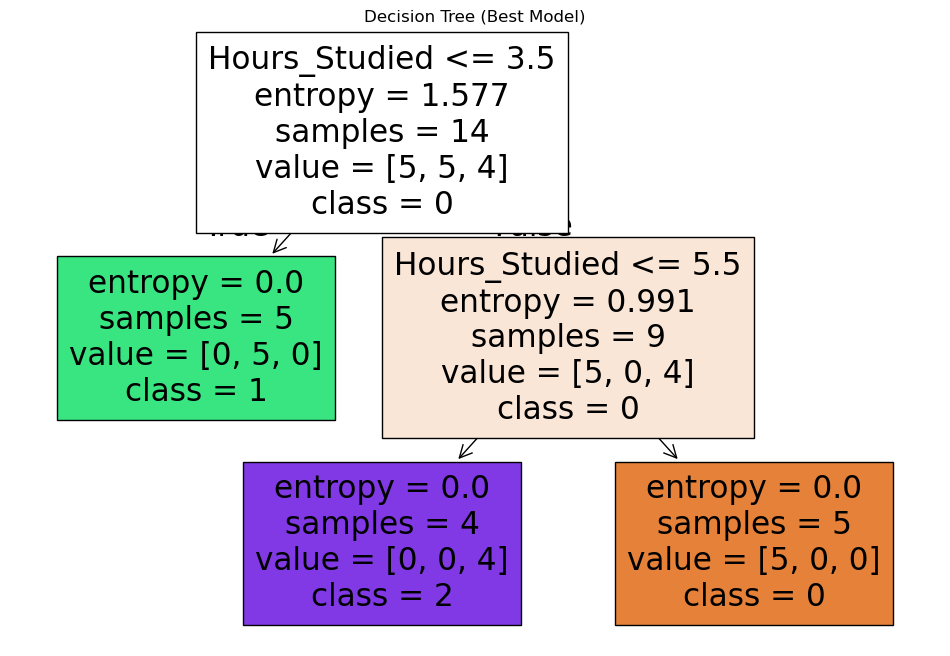

In [16]:
best_dt = DecisionTreeClassifier(criterion="entropy", max_depth=3, random_state=42)
best_dt.fit(X_train, y_train)
class_labels = [str(c) for c in best_dt.classes_]

plt.figure(figsize=(12, 8))
plot_tree(best_dt, feature_names=X.columns, class_names=class_labels, filled=True)
plt.title("Decision Tree (Best Model)")
plt.show()

In [17]:
importances = pd.DataFrame({
    "Feature": X.columns,
    "Importance": best_dt.feature_importances_
}).sort_values(by="Importance", ascending=False)

print("\nFeature Importances")
print(importances)


Feature Importances
           Feature  Importance
0    Hours_Studied         1.0
1  Previous_Scores         0.0
2  Extracurricular         0.0
3      Sleep_Hours         0.0
4  Internet_Access         0.0
5       Attendance         0.0


In [18]:
print("\n--- Insights & Conclusion ---")
print("1. Features like Hours_Studied, Previous_Scores, and Attendance strongly influence performance.")
print("2. Teachers can use this model to guide students towards better study habits and attendance.")
print("3. Decision Trees are interpretable and show clear decision rules, which makes them useful in education analytics.")     


--- Insights & Conclusion ---
1. Features like Hours_Studied, Previous_Scores, and Attendance strongly influence performance.
2. Teachers can use this model to guide students towards better study habits and attendance.
3. Decision Trees are interpretable and show clear decision rules, which makes them useful in education analytics.
